# Data inspection

**Visualize 5 random images from the train directory** 

Image: IMG_0243_JPG.rf.2ed8eb785aeeff8213c029ad790c6457.jpg


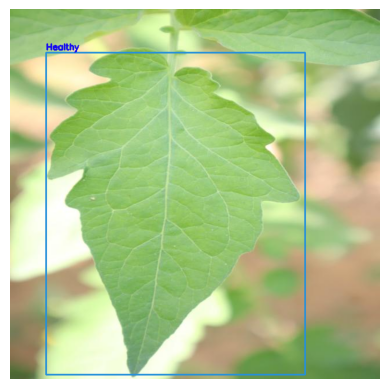

Image: IMG_0259_JPG.rf.439d6f79fa2db69b7e7a01e8f3e3b571.jpg


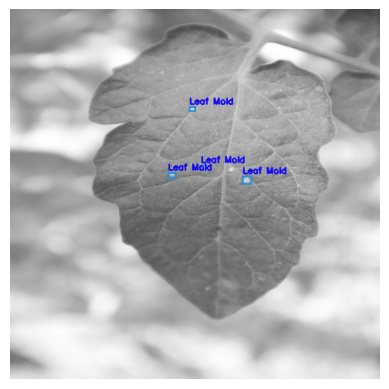

Image: IMG_0240_JPG.rf.774f849b4e813b0234571faf69a3e491.jpg


Image: IMG_0565_JPG.rf.8370ec22a20694b84a5de2c177fe36e8.jpg


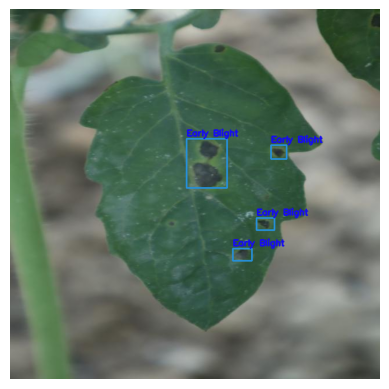

Image: IMG_0483_JPG.rf.764fb44a155d94a1524298f609675f47.jpg


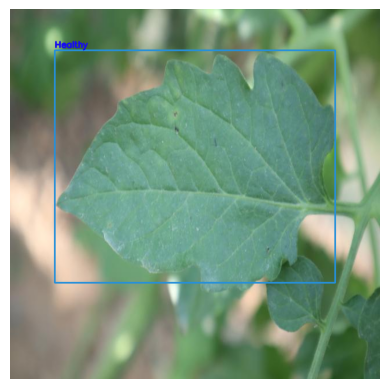

In [2]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt

# Function to visualize bounding boxes on an image
def visualize_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        print(f'{annotation_path}, " is empty')
    
    for _, row in annotations.iterrows():
        class_label = row[0]
        class_label = class_labels[int(class_label)]
        x_center, y_center, width, height = row[1:].values
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (218, 144, 38), 2)
        cv2.putText(image, str(class_label), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (239, 13, 23), 2)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

images_dir = 'train/images'
annot_dir =  'train/labels'

class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Target Spot', 'Black Spot']

image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

random_images = random.sample(image_files, 5)

for image_file in random_images:
    image_path = os.path.join(images_dir, image_file)
    annotation_path = os.path.join(annot_dir, image_file.replace('.jpg', '.txt'))
    
    print("Image:", image_file)
    visualize_bounding_boxes(image_path, annotation_path, class_labels)

**Count label distribution**

In [3]:
class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Target Spot', 'Black Spot']

labels_dir = 'train/labels'

annotation_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

class_counts = {label: 0 for label in class_labels}
empty_files = []

for annotation_file in annotation_files:
    annotation_path = os.path.join(labels_dir, annotation_file)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        empty_files.append(annotation_file)
    
    for class_label in annotations[0]:
        class_counts[class_labels[class_label]] += 1

**Print out label distribution**

In [4]:
print("Label Distribution:")
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} instances")

Label Distribution:
Bacterial Spot: 84 instances
Early Blight: 1090 instances
Healthy: 162 instances
Late Blight: 303 instances
Leaf Mold: 87 instances
Target Spot: 39 instances
Black Spot: 377 instances


**Count empty files**

In [5]:
print(f'There are {len(empty_files) } empty files')

There are 18 empty files


**Plot the label distribution**

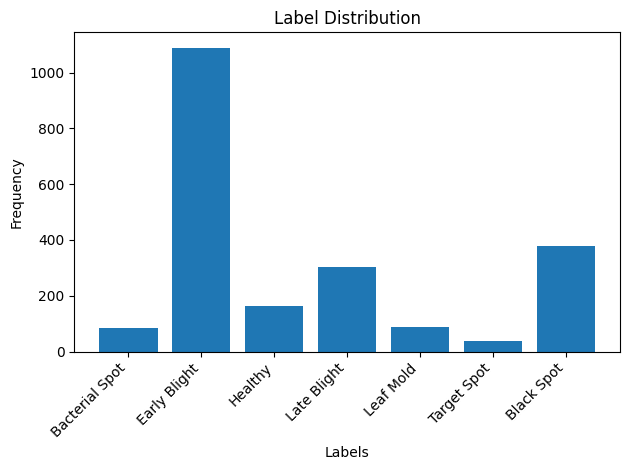

In [6]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Install Ultralytics library

In [15]:
!pip install ultralytics

You should consider upgrading via the 'c:\users\zimbadev\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics YOLOv8.1.37 🚀 Python-3.9.4 torch-2.2.2+cpu CPU (Intel Core(TM) i7-4810MQ 2.80GHz)
Setup complete ✅ (8 CPUs, 31.9 GB RAM, 66.9/238.5 GB disk)

OS                  Windows-10-10.0.19041-SP0
Environment         Windows
Python              3.9.4
Install             pip
RAM                 31.91 GB
CPU                 Intel Core(TM) i7-4810MQ 2.80GHz
CUDA                None

matplotlib          ✅ 3.8.2>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.3.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.12.0>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.8
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.2.1>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0


In [9]:
!wandb disabled

'wandb' is not recognized as an internal or external command,
operable program or batch file.


# Training

In [21]:
!yolo detect train model=yolov8n.pt data=dataset.yaml epochs=75 imgsz=640 batch=-1

# Evaluation

In [10]:
import matplotlib.image as mpimg

In [11]:
img = mpimg.imread('/kaggle/working/runs/detect/train/F1_curve.png')
imgplot = plt.imshow(img)
plt.show()

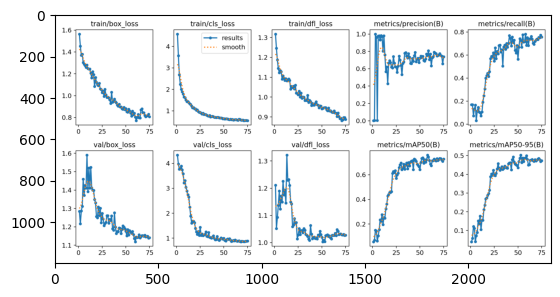

In [12]:
img = mpimg.imread('/kaggle/working/runs/detect/train/results.png')
imgplot = plt.imshow(img)
plt.show()

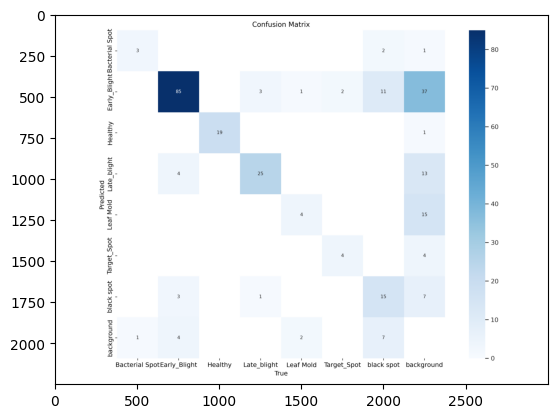

In [13]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

# Inference

In [15]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf = 0.4 source = "/kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images" save = True

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/31 /kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg: 640x640 1 Healthy, 12.8ms
image 2/31 /kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images/IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg: 640x640 3 Early_Blights, 4 Leaf Molds, 3 black spots, 6.9ms
image 3/31 /kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images/IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg: 640x640 2 Early_Blights, 6.7ms
image 4/31 /kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images/IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg: 640x640 3 Early_Blights, 2 Leaf Molds, 1 black spot, 8.2ms
image 5/31 /kaggle/input/tomato-leaf-diseases-detection-computer-vision/test/images/IMG_0281_JPG.rf

In [16]:
from glob import glob
from PIL import Image

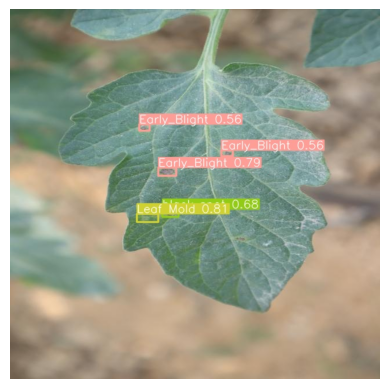

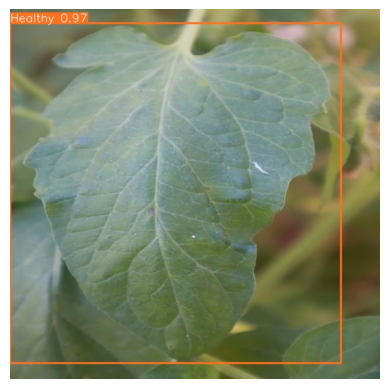

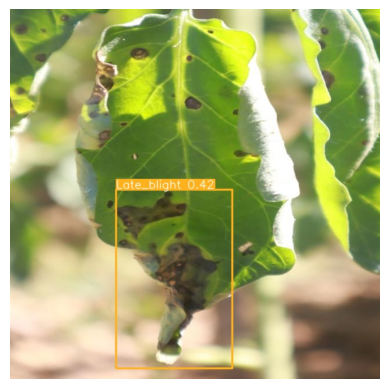

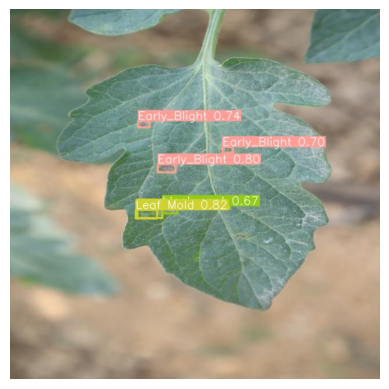

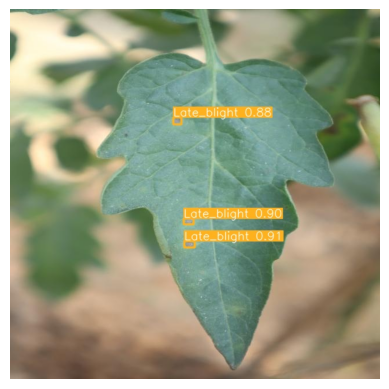

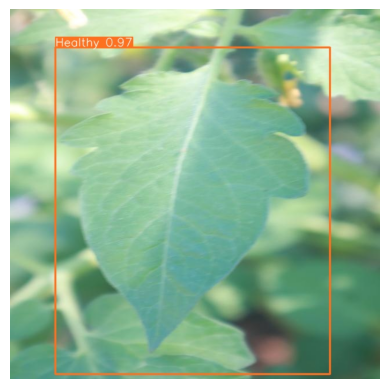

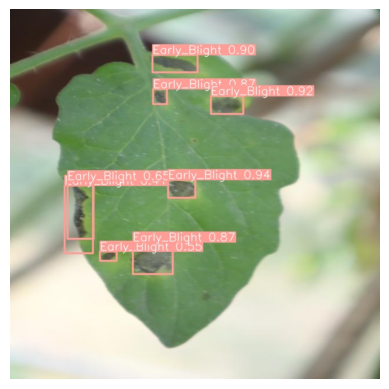

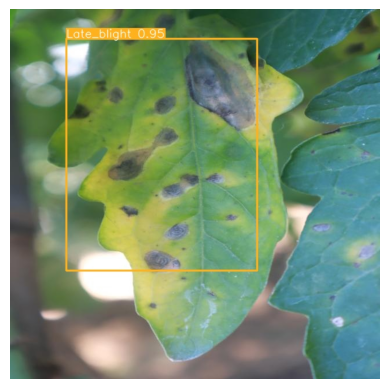

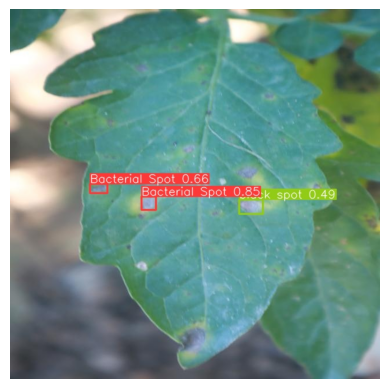

In [17]:
for image_path in glob(f'/kaggle/working/runs/detect/predict/*.jpg')[10:20]:
      plt.imshow(Image.open(image_path)); plt.axis("off"); plt.show()
      print("\n")